<a href="https://colab.research.google.com/github/hanarifdahs/hacktiv8/blob/main/h8dsft_P0W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**Overview** daridataset yang digunakan adalah

**Objective** yang ingin dicapai adalah

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# Data Cleaning

**Missing Value**

In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
df['Type 2'].isnull().sum()

386

In [9]:
df['Type 2'].fillna('Not Exist', inplace=True)

In [10]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
df["Type 1"] = pd.Categorical(df["Type 1"])
df["Type 2"] = pd.Categorical(df["Type 2"])
df["Generation"] = pd.Categorical(df["Generation"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   #           800 non-null    int64   
 1   Name        800 non-null    object  
 2   Type 1      800 non-null    category
 3   Type 2      800 non-null    category
 4   Total       800 non-null    int64   
 5   HP          800 non-null    int64   
 6   Attack      800 non-null    int64   
 7   Defense     800 non-null    int64   
 8   Sp. Atk     800 non-null    int64   
 9   Sp. Def     800 non-null    int64   
 10  Speed       800 non-null    int64   
 11  Generation  800 non-null    category
 12  Legendary   800 non-null    bool    
dtypes: bool(1), category(3), int64(8), object(1)
memory usage: 61.2+ KB


In [13]:
df.rename(columns = {
    'Name'  : 'NAME',
    'Type 1'  : 'TYPE 1',
    'Type 2'  : 'TYPE 2',
    'Total' : 'TOTAL',
    'Attack'  : 'ATTACK',
    'Defense' :   'DEFENSE',
    'Sp. Atk' : 'SP. ATTACK',
    'Sp. Def' : 'SP. DEFENSE',
    'Speed' : ' SPEED',
    'Generation'  : 'GENERATION',
    'Legendary' : 'LEGENDARY'
},inplace=True)

In [14]:
df.drop("#", axis = 1, inplace=True)

# Data Exploration

In [15]:
df

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Not Exist,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Apa aja pokemon yang legendary

In [17]:
df[["NAME","LEGENDARY"]][df["LEGENDARY"]==1]

,NAME,LEGENDARY
156,Articuno,True
157,Zapdos,True
158,Moltres,True
162,Mewtwo,True
163,MewtwoMega Mewtwo X,True
...,...,...
795,Diancie,True
796,DiancieMega Diancie,True
797,HoopaHoopa Confined,True
798,HoopaHoopa Unbound,True


The list of the strongest to weakest pokemon

In [44]:
df.sort_values(by = 'TOTAL',ascending=False)

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,Not Exist,780,106,150,70,194,120,140,1,True
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,KyogrePrimal Kyogre,Water,Not Exist,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
13,Caterpie,Bug,Not Exist,195,45,30,35,20,20,45,1,False
288,Wurmple,Bug,Not Exist,195,45,45,35,20,30,20,3,False
446,Kricketot,Bug,Not Exist,194,37,25,41,25,41,25,4,False
322,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False


Rata-rata total (attacks) legendary pokemon

In [19]:
df.query("LEGENDARY == 1").TOTAL.mean()

637.3846153846154

Berapa banyak pokemon yang legendary di setiap generation (di plot)

In [20]:
legend_plot = df.query("LEGENDARY == 1").groupby("GENERATION")["LEGENDARY"].sum()
legend_plot

GENERATION
1     6
2     5
3    18
4    13
5    15
6     8
Name: LEGENDARY, dtype: int64

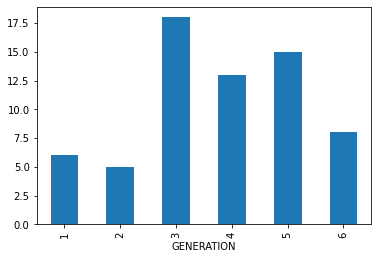

In [21]:
# plt.figure(figsize = (10,6))
# plt.title("Pokemon Legendary per Generation")
# sns.barplot(data = df, x = "Generation", y = "Legendary == 1")
legend_plot.plot(kind = "bar")

Pokemon yang paling kuat per generation

In [24]:
strongest = df.groupby("GENERATION").max()['TOTAL']

Text(0.5, 1.0, 'The Highest Stats per Generation')

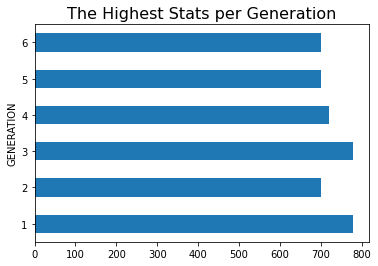

In [25]:
ax = strongest.plot(kind = "barh")
ax.set_title("The Highest Stats per Generation", fontsize = 16)

pokemon yang paling tinggi attacks (attack+sp.attack) dan defenses (defense+sp.defense) nya tapi gapunya type 2



In [27]:
pokemon = df.copy()
pokemon['ATTACKS'] = df['ATTACK'] + df['SP. ATTACK']
pokemon['DEFENSES'] = df['DEFENSE'] + df['SP. DEFENSE'] 
pokemon

,NAME,TYPE 1,TYPE 2,TOTAL,HP,ATTACK,DEFENSE,SP. ATTACK,SP. DEFENSE,SPEED,GENERATION,LEGENDARY,ATTACKS,DEFENSES
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,114,114
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,142,143
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,182,183
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,222,243
4,Charmander,Fire,Not Exist,309,39,52,43,60,50,65,1,False,112,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,200,300
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,320,220
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,260,190
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,330,190


In [28]:
pokemon['NAME'][pokemon['TYPE 2'] == 'Not Exist'].agg({'ATTACKS': 'max','DEFENSES' : 'max'})

ATTACKS     Zorua
DEFENSES    Zorua
Name: NAME, dtype: object

rata-rata pokemon yang paling kuat pergenerasi

Text(0.5, 1.0, 'Average Total Stats Per Generation')

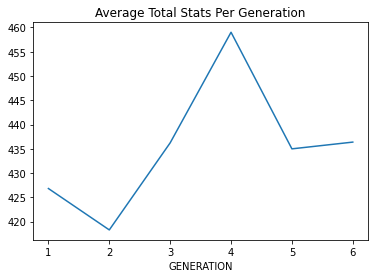

In [29]:
# df.iloc[:,[1,-2,4]].groupby('Generation')['Total'].mean()
rata = df.groupby('GENERATION').mean()['TOTAL'].plot()
plt.title('Average Total Stats Per Generation')

# Summary